**Copyright (C) Bio & Health Informatics Lab, Seoul National University, 2024.**

This material is for educational uses only.

Some contents are based on the mateerial provided by other paper/book authors and may be copyrighted by them.

Written by Dongmin Bang.

### ***Caution!***

Before starting this lab session, please follow the instructions and make sure your notebook is working properly!

1. copy this notebook in your Google Drive.

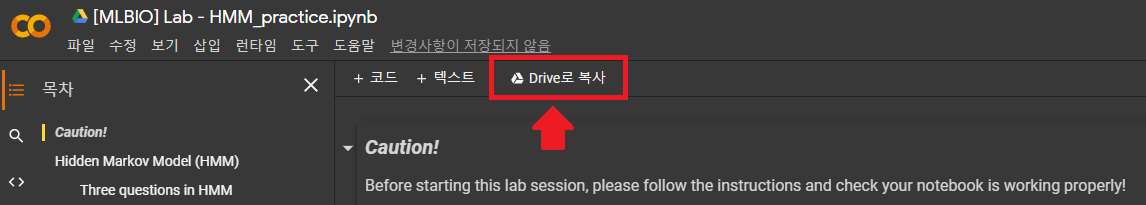

2. Run the following cell. If you see 'Hello, world!', you are OK!

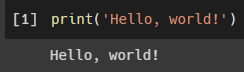

In [ ]:
# run here
print('Hello, world!')

Hello, world!


# Data Preparation for Cancer Classification
Here we download, prepare and split the data for cancer classification with  machine learning algorithms.

We first upload the data to colab drive.
- `cancer_clf_data_bot1000.csv`: contains the expression measures of 1000 genes with the lowest standard deviation from 801 patients ([link](https://drive.google.com/file/d/1YfXh4zKlQp71X9E4D31vYKitIwtLzN0A/view?usp=drive_link))
- `cancer_clf_label.csv`: contains the cancer classes of 801 patients (BRCA, KIRC, COAD, LUAD, PRAD) ([link](https://drive.google.com/file/d/1adzxhARafNrg1vbk3k-O2v89cg3XLK61/view?usp=drive_link))

In [ ]:
from google.colab import files
file = files.upload()

Saving cancer_clf_label.csv to cancer_clf_label.csv
Saving cancer_clf_data_bot1000.csv to cancer_clf_data_bot1000.csv


In [ ]:
# import pandas for manipulation of dataframes
import pandas as pd

cancer_clf_data = pd.read_csv('cancer_clf_data_bot1000.csv', index_col=0)
cancer_clf_label = pd.read_csv('cancer_clf_label.csv', index_col=0)

class_dict = {
    'BRCA':0,
    'KIRC':1,
    'COAD':2,
    'LUAD':3,
    'PRAD':4
}

cancer_clf_label['Class'] = cancer_clf_label['Class'].map(class_dict)
cancer_clf_label

,Class
sample_0,4
sample_1,3
sample_2,4
sample_3,4
sample_4,0
...,...
sample_796,0
sample_797,3
sample_798,2
sample_799,4


## Splitting data into train and test sets

In [ ]:
import sklearn # sklearn library
from sklearn import model_selection # model_selection module
from sklearn.model_selection import train_test_split # train_test_split function

X_train, X_test, y_train, y_test = train_test_split(cancer_clf_data,
                                                    cancer_clf_label,
                                                    test_size=0.2,  # 8:2
                                                    random_state=42) #seeding
X_train.values

array([[0.        , 0.        , 0.        , ..., 0.85965156, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.51722529, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_train.shape, X_test.shape

((640, 1000), (161, 1000))

## Scaling data before training

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # standard normalization with mean and std

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train  # compare with the values above

array([[ 0.        , -0.03955939, -0.03955939, ...,  2.23024062,
        -0.45589725, -0.28663408],
       [ 0.        , -0.03955939, -0.03955939, ..., -0.36301344,
        -0.45589725, -0.28663408],
       [ 0.        , -0.03955939, -0.03955939, ..., -0.36301344,
        -0.45589725, -0.28663408],
       ...,
       [ 0.        , -0.03955939, -0.03955939, ...,  1.19726592,
        -0.45589725, -0.28663408],
       [ 0.        , -0.03955939, -0.03955939, ..., -0.36301344,
        -0.45589725, -0.28663408],
       [ 0.        , -0.03955939, -0.03955939, ..., -0.36301344,
        -0.45589725, -0.28663408]])

# Implementing deep learning classifier with `pytorch`
- Some of the contents sourced from:
  - University of Amsterdam, deep learning tutorial: https://github.com/phlippe/uvadlc_notebooks

## Deep Learning
- The basic concept of deep learning roots from perceptrons, also called 'neurons'
- The concept of perceptron arises from biological neurons in our body
- Perceptrons were proposed by Frank Rosenblatt in 1957 and initially only allowed for very simple linear classification,
  - but it was discovered that more complex models could be constructed by stacking perceptrons in multiple layers
  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/800px-Neuron.svg.png" width=600>

<img src="https://www.nomidl.com/wp-content/uploads/2022/04/image-5.png" width=600>


Basically, the perceptron takes $n$-dimensional inputs 𝑥1 , 𝑥2 , 𝑥3 , ... , 𝑥𝑛 and approximates them as a **linear** combination $\sum w_i x_i + b$.

In other words, if the input tensor has $N$ dimensions and the perceptron layer that transforms it into an output of $M$ dimensions corresponds to a matrix product with dimensions $N \times M$.

What we call learning is finding the parameters, also called weights, that accurately predict the desired objective value ($𝑤_𝑖$ values).

The linear combination is then passed through the **nonlinear** **activation function** one more time to get the final estimate.

$\hat{y}=f(\sum w_i x_i + b)$

Here, $f$ is the **nonlinear activation function**.

The reason for using a nonlinear activation function is that even if you take multiple linear combinations of linear combinations, the result is linear, so you need a nonlinear activator in the middle to infer non-linear relationships.


<img src="https://www.researchgate.net/publication/334609713/figure/fig1/AS:783455927406593@1563801857102/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single_Q640.jpg" width=600>

This stacking of multiple perceptrons in multiple layers is called a multi-layer perceptron (MLP).

And a multilayer perceptron can be understood as a continuous computation of multiple layers of parameter matrices.

- *Universal approximation theorem* suggests that deep neural networks (MLPs) have the capacity to learn and approximate almost *any* function, making them versatile and powerful tools in various machine learning tasks. (https://en.wikipedia.org/wiki/Universal_approximation_theorem)


  ## Pytorch
  `PyTorch` is an open source machine learning framework that allows you to write your own neural networks and optimize them efficiently.
  - Pytorch is well established, has a huge developer community (originally developed by Facebook), is very flexible and especially used in research
  - Many current papers publish their code in PyTorch, and thus it is good to be familiar with PyTorch as well.
  - There are other open source libraries for deep learning, including: TensorFlow (Google), JAX and Caffe.

In [ ]:
# pytorch is preinstalled in colab. Let's load it!

import torch
print("Using torch", torch.__version__)

Using torch 2.2.1+cu121


In [ ]:
# We can also random seed with the following code:
torch.manual_seed(42)

## Gradient descent and Backpropagation

One of the main reasons for using PyTorch (and others) in Deep Learning projects is that we can automatically get gradients/derivatives of functions that we define.

Training large deep learning models with millions of parameters is enabled by gradient descent.


In order to perform gradient descent through multiple layers, we have to compute the errors that the model makes and at the same time keep track of the calculations it goes through.

In other words, Given an input, we define our function by manipulating that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a computational graph. This graph shows how to arrive at our output from our input.

for example, a graph for performing

$a = x + 2$

$b = a ^ 2$

$c = b + 3$

$ y = \bar c $

can be shown as:


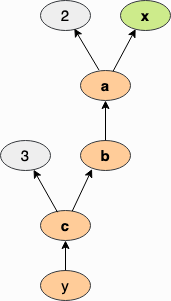

In [ ]:
# A variable created with torch does not require gradient tracking
x = torch.ones((3,))
print(x.requires_grad)

False


We can change this for an existing tensor using the function `requires_grad_()` (underscore indicating that this is a in-place operation). Alternatively, when creating a tensor, you can pass the argument `requires_grad=True` to most initializers we have seen above.

In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


As we compute multiple operation through addition and multiplication, we create a graph as shown above.

In [ ]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [ ]:
y.backward()

print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


## Model building

In [ ]:
def seed_everything(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f'setting random seed to {seed}')

seed_everything()

setting random seed to 42


Building an MLP model with one hidden layer and Tanh as its activation function.

- Other activation functions: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

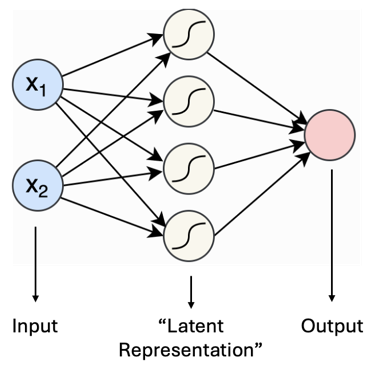

In [ ]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Define the layers that from the neural network.
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        nn.Dropout(0.5)
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        nn.Dropout(0.3)
        x = self.linear2(x)
        return x

    def encode(self, x):
        # return the latent representation of the model
        return self.linear1(x)

input_dim = X_train.shape[1]
hidden_dim = 128
output_dim = 5 # outputs probabilities for 5 cancer types
model = MLP(input_dim, hidden_dim, output_dim)


1. Number of layers
: Adjustments aligned with the hyperparameters suggest a simplification to a single-layered network. This reduction in complexity is intended to prevent overfitting, especially when the dataset is not large enough to warrant deeper architectures.
2. Hidden dimensions
: The increase in hidden dimensions to 512 represents a significant escalation in the model's capacity, allowing it to learn more complex representations of the data. While this can enhance the model's ability to fit the training data closely and model complex relationships, it also raises the risk of overfitting, particularly if the increase in parameters is not complemented by sufficient training data, regularization techniques, or proper tuning of other hyperparameters.
3. Activation function
: The model now utilizes the Rectified Linear Unit (ReLU) activation function, replacing the previously mentioned Tanh. ReLU is favored in many neural network applications due to its simplicity and efficiency.
4. Dropout rate
: The incorporation of dropout with a rate of approximately 0.5 introduces regularization to the model. Dropout randomly deactivates a subset of neurons during training, which helps in preventing the network from becoming overly reliant on any specific neuron and promotes better generalization.

You can also print the parameters of all the submodules and layers that make up the neural network using the `parameters()` or `named_parameters()` functions.

In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([128, 1000])
Parameter linear1.bias, shape torch.Size([128])
Parameter linear2.weight, shape torch.Size([5, 128])
Parameter linear2.bias, shape torch.Size([5])


## Training & Optimization

After defining the model, it is time to prepare the `optimization` of the model. During training, we will perform the following steps:

1. Obtain the predictions from the model for the input
2. Calculate the **loss** based on the difference between predictions and labels
3. Backpropagation: calculate the **gradients** for every parameter with respect to the loss
4. **Update the parameters** of the model in the direction of the gradients

### Loss modules

We can calculate the loss for a batch by simply performing a few tensor operations as those are automatically added to the computation graph. For instance, for multi-class binary classification, we can use Cross Entropy (CE) which is defined as follows:

$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})$

where
- $y_{ij}$ is the ground truth probability that sample $i$ belongs to class $j$.
- $\hat{y}_{ij}$  is the predicted probability that sample $i$ belongs to class $j$, in range of $[0,1]$
- $N$ is the number of samples
- $C$ is the number of classes.

PyTorch already provides a list of predefined loss functions which we can use (see [here](https://pytorch.org/docs/stable/nn.html#loss-functions) for a full list).

In [ ]:
# Cross Entropy Loss module
criterion = nn.CrossEntropyLoss()

### Stochastic Gradient Descent

For updating the parameters, PyTorch provides the package `torch.optim` that has most popular optimizers implemented. We will discuss the specific optimizers and their differences later in the course, but will for now use the simplest of them: `torch.optim.SGD`.

Stochastic Gradient Descent updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). Therefore, we slowly move towards the direction of minimizing the loss. A good default value of the learning rate for a small network as ours is 0.1.

<img src="https://editor.analyticsvidhya.com/uploads/631731_P7z2BKhd0R-9uyn9ThDasA.png" width=500>

In [ ]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In order to enhance the model's performance, it is proposed to utilize Optuna, a hyperparameter optimization framework, to systematically search for the optimal configuration of the model's hyperparameters. This strategic approach will enable the identification of the most effective hyperparameters, thereby potentially elevating the model's accuracy and efficiency.

### Training the model

Now we input the prepared data to the model!

In [ ]:
# First, change the data types from numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.flatten(), dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.flatten(), dtype=torch.long)

Here, we train the model for 5000 epochs and see how its loss decreases.

In [ ]:
train_losses = []
test_losses = []

for epoch in range(5000):
    # train
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # test
    model.eval()
    with torch.no_grad():  # we do not want to keep track during testing
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor)
        test_losses.append(test_loss.item())
    if epoch % 100 == 0:
        print('Epoch:', epoch, ' loss:', loss.item(), 'test loss:', test_loss.item())

Epoch: 0  loss: 1.6281417608261108 test loss: 1.6332660913467407
Epoch: 100  loss: 0.7672533988952637 test loss: 0.9705501794815063
Epoch: 200  loss: 0.3637738823890686 test loss: 0.6316242814064026
Epoch: 300  loss: 0.20557145774364471 test loss: 0.4861365258693695
Epoch: 400  loss: 0.1330508142709732 test loss: 0.4153663218021393
Epoch: 500  loss: 0.09421958029270172 test loss: 0.37606990337371826
Epoch: 600  loss: 0.0709589272737503 test loss: 0.3520020544528961
Epoch: 700  loss: 0.05586514621973038 test loss: 0.33619147539138794
Epoch: 800  loss: 0.04547880217432976 test loss: 0.3252631425857544
Epoch: 900  loss: 0.038001228123903275 test loss: 0.31741711497306824
Epoch: 1000  loss: 0.032419051975011826 test loss: 0.31161829829216003
Epoch: 1100  loss: 0.028125962242484093 test loss: 0.3072355091571808
Epoch: 1200  loss: 0.0247413981705904 test loss: 0.30386531352996826
Epoch: 1300  loss: 0.022016804665327072 test loss: 0.3012392520904541
Epoch: 1400  loss: 0.01978421024978161 test

### Visualization of the loss curve
Finally, we visualize the loss curve and see how our model is trained

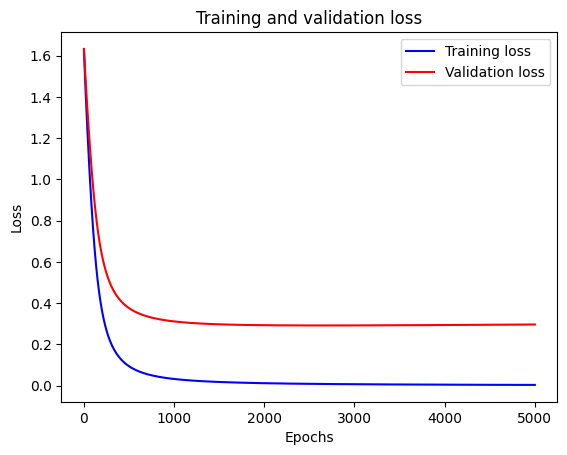

In [ ]:
from matplotlib import pyplot as plt

epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.plot(epochs, test_losses, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluation of model performance

In [ ]:
# final prediction and accuracy
y_pred = model(X_test_tensor)
_, predicted = torch.max(y_pred, 1) # get the class index
predicted

tensor([3, 0, 3, 1, 0, 2, 0, 2, 4, 2, 2, 0, 3, 4, 1, 0, 3, 4, 0, 3, 3, 2, 1, 3,
        0, 0, 2, 0, 4, 4, 0, 4, 4, 2, 0, 0, 3, 3, 3, 3, 2, 0, 0, 0, 1, 4, 1, 2,
        0, 0, 4, 3, 1, 0, 1, 4, 1, 0, 3, 3, 3, 1, 4, 0, 4, 0, 3, 4, 1, 0, 0, 3,
        0, 0, 1, 3, 4, 4, 1, 0, 1, 0, 0, 1, 3, 0, 0, 4, 2, 2, 2, 1, 0, 0, 0, 4,
        3, 2, 2, 0, 0, 0, 0, 3, 0, 1, 4, 1, 3, 0, 4, 0, 4, 0, 3, 4, 0, 3, 3, 4,
        1, 1, 0, 3, 3, 4, 0, 0, 3, 0, 0, 0, 4, 1, 2, 0, 4, 3, 4, 0, 0, 1, 4, 3,
        4, 2, 1, 0, 4, 1, 0, 0, 3, 1, 1, 2, 4, 2, 3, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

print(f'MLP accuracy: {accuracy_score(y_test_tensor, predicted)*100:.2f}%')

MLP accuracy: 91.93%


In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.8 MB/s eta 0:00:00


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

def objective(trial):
    # Hyperparameters to be optimized
    num_layers = trial.suggest_int('num_layers', 1, 3)  # More focused range
    hidden_dim = trial.suggest_categorical('hidden_dim', [64, 128, 256])  # Based on previous good results
    activation = trial.suggest_categorical('activation', ['ReLU', 'Tanh'])
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.3)
    lr = trial.suggest_float('lr', 1e-4, 1e-1, log=True)


    # Cross-validation setup
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for train_index, val_index in kf.split(X_train, y_train.values.flatten()):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.values[train_index].flatten(), y_train.values[val_index].flatten()

        # Model definition
        class CustomMLP(nn.Module):
            def __init__(self, input_dim, output_dim):
                super(CustomMLP, self).__init__()
                layers = [nn.Linear(input_dim, hidden_dim)]
                for _ in range(num_layers - 1):
                    layers.extend([
                        getattr(nn, activation)(),
                        nn.Dropout(dropout_rate),
                        nn.Linear(hidden_dim, hidden_dim)
                    ])
                layers.append(nn.Linear(hidden_dim, output_dim))
                self.model = nn.Sequential(*layers)

            def forward(self, x):
                return self.model(x)

        model = CustomMLP(input_dim, output_dim)
        optimizer = optim.SGD(model.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()

        # Early stopping setup
        best_loss = np.inf
        patience = 10
        patience_counter = 0

        # Training loop with early stopping
        for epoch in range(100):
            model.train()
            optimizer.zero_grad()
            y_pred = model(torch.tensor(X_train_fold, dtype=torch.float32))
            loss = criterion(y_pred, torch.tensor(y_train_fold, dtype=torch.long))
            loss.backward()
            optimizer.step()

            # Validation loss
            model.eval()
            with torch.no_grad():
                y_pred_val = model(torch.tensor(X_val_fold, dtype=torch.float32))
                val_loss = criterion(y_pred_val, torch.tensor(y_val_fold, dtype=torch.long))

            # Check early stopping condition
            if val_loss < best_loss:
                best_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    break  # Early stopping

        # Evaluation on validation set
        model.eval()
        with torch.no_grad():
            y_pred_val = model(torch.tensor(X_val_fold, dtype=torch.float32))
            _, predicted = torch.max(y_pred_val, 1)
            accuracies.append(accuracy_score(y_val_fold, predicted.numpy()))

    # Objective: Mean accuracy across folds
    return np.mean(accuracies)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2024-03-19 07:31:45,086] A new study created in memory with name: no-name-679d4857-1585-4f64-8888-74b446c22a53
[I 2024-03-19 07:31:50,136] Trial 0 finished with value: 0.921875 and parameters: {'num_layers': 1, 'hidden_dim': 64, 'activation': 'ReLU', 'dropout_rate': 0.19163291605686997, 'lr': 0.05258721299801657}. Best is trial 0 with value: 0.921875.
[I 2024-03-19 07:32:02,855] Trial 1 finished with value: 0.3734375 and parameters: {'num_layers': 3, 'hidden_dim': 256, 'activation': 'ReLU', 'dropout_rate': 0.12259742434602541, 'lr': 0.005903219368937215}. Best is trial 0 with value: 0.921875.
[I 2024-03-19 07:32:15,537] Trial 2 finished with value: 0.3734375 and parameters: {'num_layers': 3, 'hidden_dim': 256, 'activation': 'ReLU', 'dropout_rate': 0.294229117969636, 'lr': 0.004374378270226138}. Best is trial 0 with value: 0.921875.
[I 2024-03-19 07:32:18,072] Trial 3 finished with value: 0.228125 and parameters: {'num_layers': 1, 'hidden_dim': 64, 'activation': 'ReLU', 'dropout_rate

Number of finished trials: 50
Best trial: {'num_layers': 1, 'hidden_dim': 128, 'activation': 'ReLU', 'dropout_rate': 0.13091930478339275, 'lr': 0.043150814928948615}


In order to enhance the model's performance, it is proposed to utilize Optuna, a hyperparameter optimization framework, to systematically search for the optimal configuration of the model's hyperparameters. This strategic approach will enable the identification of the most effective hyperparameters, thereby potentially elevating the model's accuracy and efficiency.

### More on improving the generalization power of the model:
- Dropout: https://github.com/christianversloot/machine-learning-articles/blob/main/using-dropout-with-pytorch.md
- Batch/Layer Normalization: https://github.com/christianversloot/machine-learning-articles/blob/main/batch-normalization-with-pytorch.md
- Residual connections: https://wandb.ai/amanarora/Written-Reports/reports/Understanding-ResNets-A-Deep-Dive-into-Residual-Networks-with-PyTorch--Vmlldzo1MDAxMTk5

# Visualization of latent space with PCA

Here we visualize the latent spaces of raw gene expression and representations from our trained MLP model.

To visualize the high-dimensional data in 2D (or 3D), we often use Principal Component Analysis algorithm.


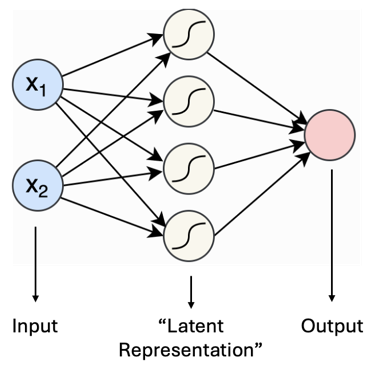

### Principal Component Analysis

PCA is a statistical method that simplifies the complexity of high-dimensional data into lower dimensions while minimizing the loss of information.

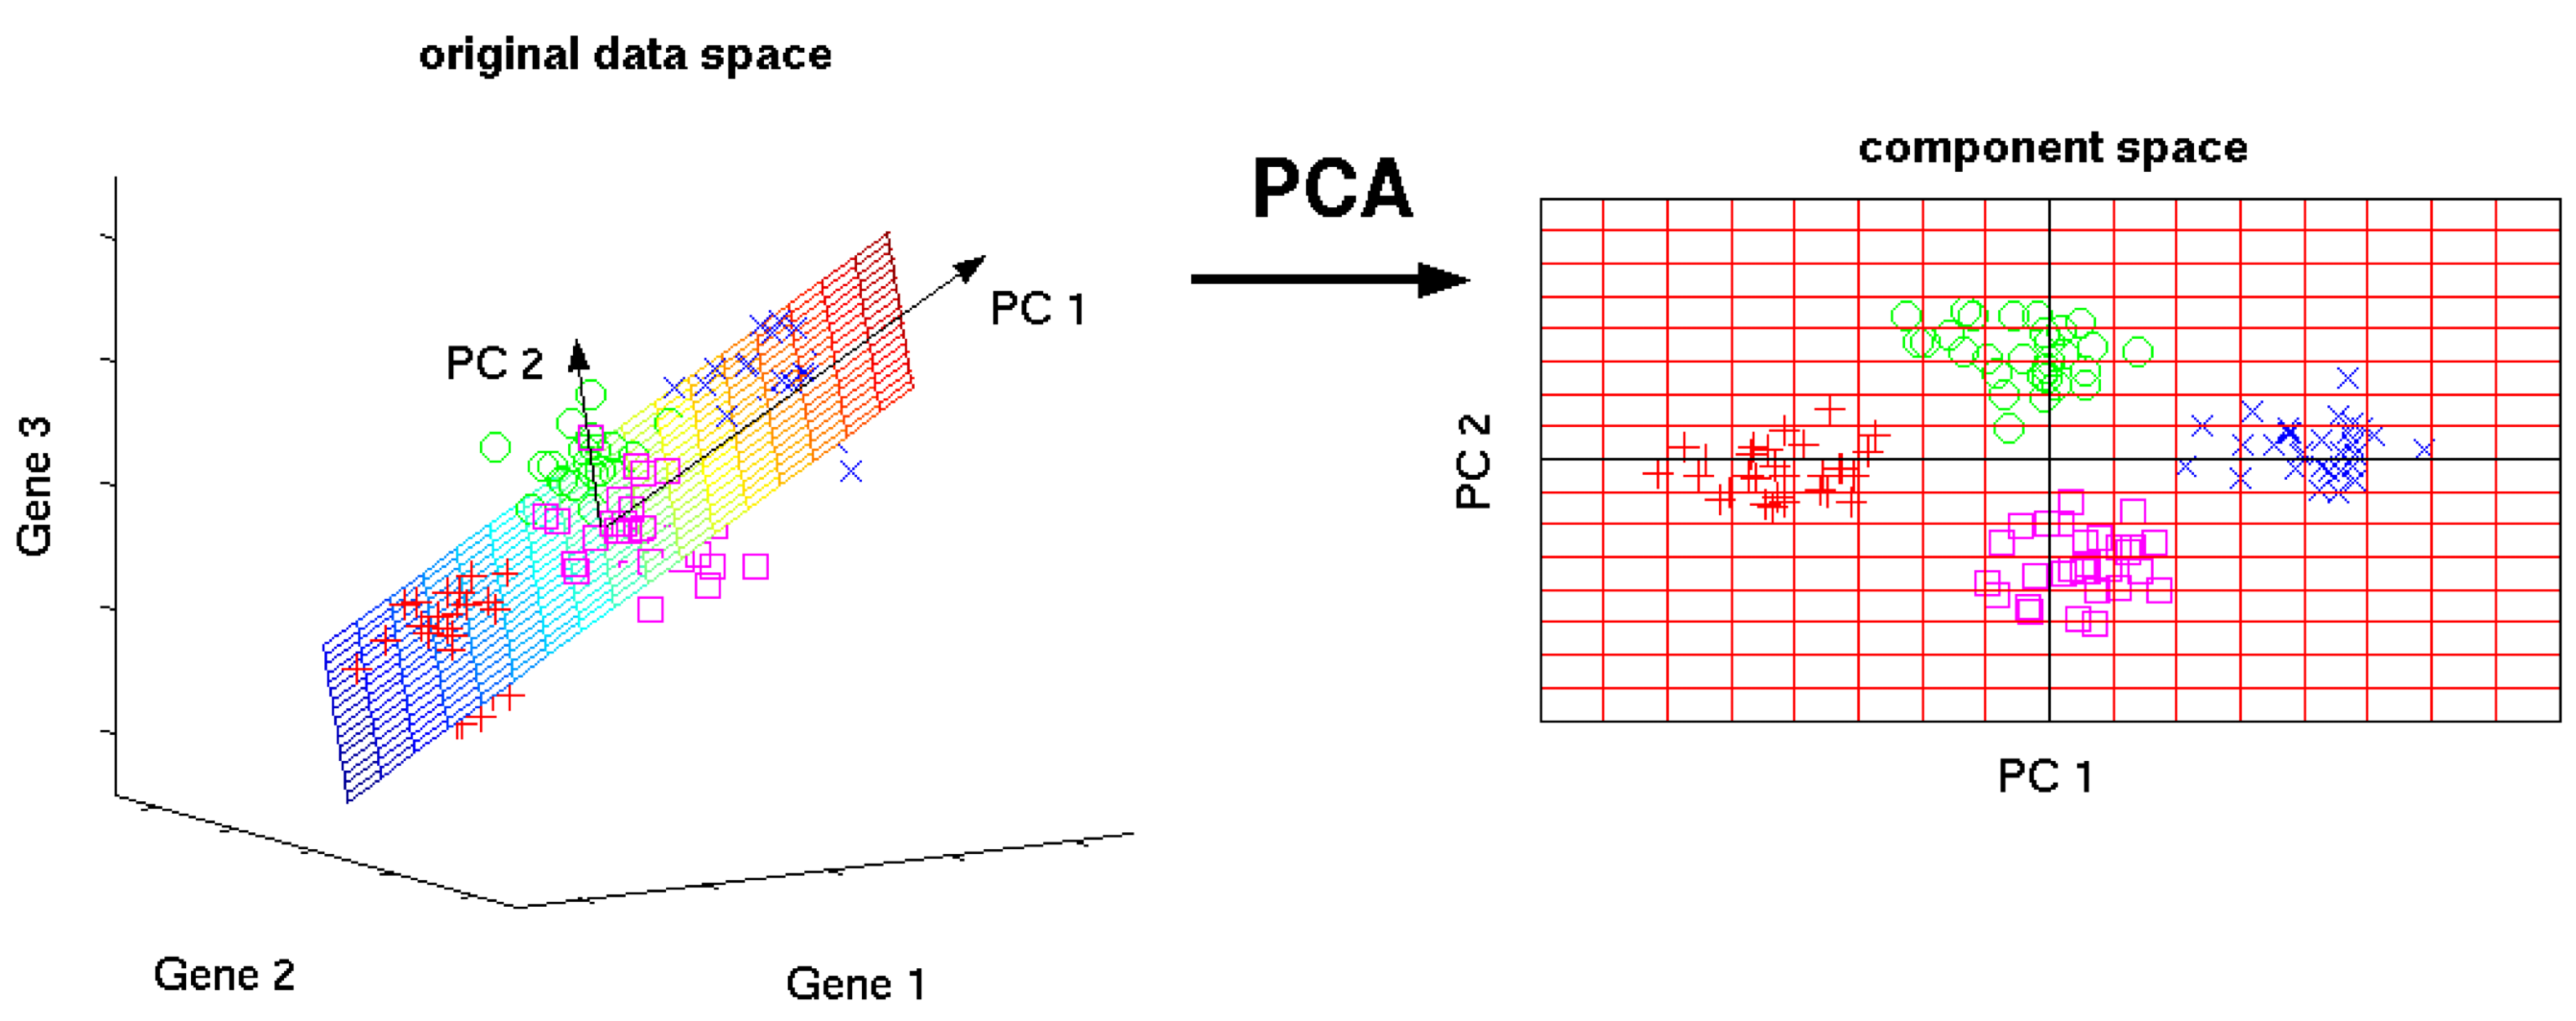

- With N data of M features, we input them as matrix of NxM dimensions into the model

- The model first calculates the covariance matrix, then computes the ‘eigenvalues’ and ‘eigenvectors’ of the covariance matrix.

- The model then projects the data points onto the eigenvectors, or Principal Components, with the highest eigenvalues

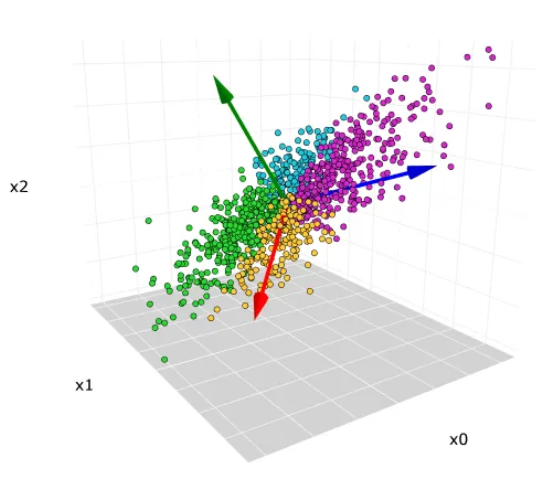

### PCA with raw expression

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(cancer_clf_data.values)

In [ ]:
gex_PCdf = pd.DataFrame({
      'PC1': X_pca[:,0],
      'PC2': X_pca[:,1],
      'Cancer Type': cancer_clf_label['Class'].values
})

gex_PCdf

,PC1,PC2,Cancer Type
0,0.187718,0.508437,4
1,-0.601059,-0.159253,3
2,-0.165171,0.187892,4
3,-0.113424,-0.228084,4
4,-0.076869,0.058389,0
...,...,...,...
796,-0.576592,-0.132272,0
797,-0.029194,0.385818,3
798,3.543312,0.098482,2
799,8.044070,-2.380866,4


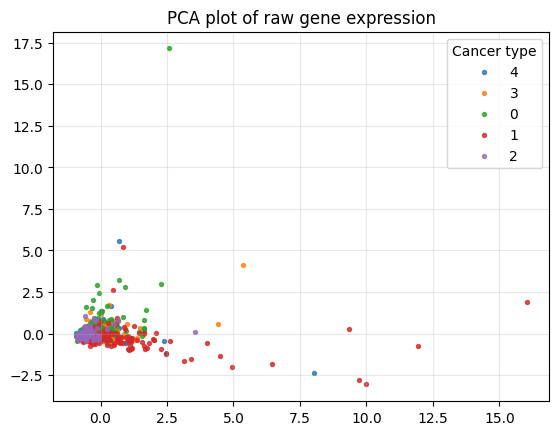

In [ ]:
from matplotlib import pyplot as plt

# plot the results and color them based on cancer type
for type in gex_PCdf['Cancer Type'].unique():
    qdf = gex_PCdf[gex_PCdf['Cancer Type']==type]
    plt.scatter(qdf['PC1'], qdf['PC2'], label=type, alpha=.8, s=8)
plt.title('PCA plot of raw gene expression')
plt.legend(title='Cancer type')
plt.grid(axis='both', alpha=.3)
plt.show()

### PCA with latent representation
We first extract the values from the model with `encode` function which returns the values from the first hidden layer.

In [ ]:
model.eval()
with torch.no_grad():
  latent_data = model.encode(torch.FloatTensor(cancer_clf_data.values))

# train a new PCA model
latent_pca = PCA(n_components=2, random_state=42)
latent_X_pca = latent_pca.fit_transform(latent_data)

In [ ]:
latent_PCdf = pd.DataFrame({
      'PC1': latent_X_pca[:,0],
      'PC2': latent_X_pca[:,1],
      'Cancer Type': cancer_clf_label['Class'].values
})

latent_PCdf

,PC1,PC2,Cancer Type
0,0.605192,2.336254,4
1,0.018239,-0.115714,3
2,-0.737827,0.316243,4
3,0.698861,1.783191,4
4,-1.108400,-0.015466,0
...,...,...,...
796,-0.936672,-0.151815,0
797,-0.037069,0.044772,3
798,0.158090,-0.105706,2
799,1.827857,1.533973,4


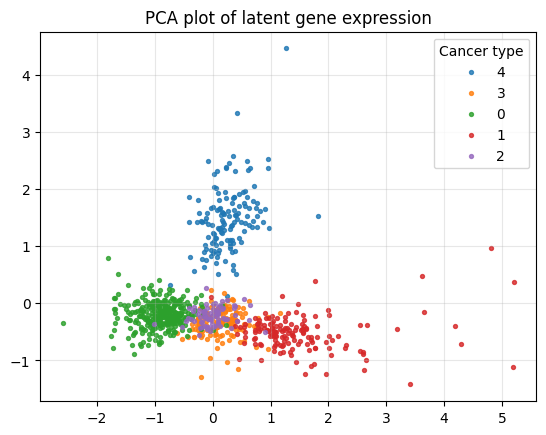

In [ ]:
for type in latent_PCdf['Cancer Type'].unique():
    qdf = latent_PCdf[latent_PCdf['Cancer Type']==type]
    plt.scatter(qdf['PC1'], qdf['PC2'], label=type, alpha=.8, s=8)
plt.title('PCA plot of latent gene expression')
plt.legend(title='Cancer type')
plt.grid(axis='both', alpha=.3)
plt.show()

Compare with the space of raw gene expression, and consider which space contains more information about the cancer types!

# Homework 1: Build your own MLP classifier for cancer classification (Due 23:59, 3/28)

- Using the same file and data split provided in the Lab 1 session, build your own MLP classifier with different hyperparameters.
  - Number of layers, Hidden dimensions, Different activation functions, Use of dropout/normalization layers, Residual connection, ...
- There will be extra points if your performance is higher than the performance of the model introduced in this session. (Accuracy: 90.68%)

**Must Follow, or there will be penalties**
- Write your codes with Colab, download the final `.ipynb` file, then upload the file on etl.
- Please set the file name as: `{student_id}_HW1.ipynb`.
- The last three cells should output:
  1. The **accuracy** of the model
  2. **PCA visualization** of the latent representations from your model
  3. A text cell with discussions on why your modifications have led to different performances (up or down).
- **Caution**: Be sure to perform random seeding for reproducibility!

1. The accuracy of the model : MLP accuracy 91.93%

2. PCA visualization of the latent representations from your model : 
![image.png](attachment:image.png)

![alt text](image.png)

1. Number of layers
: Adjustments aligned with the hyperparameters suggest a simplification to a single-layered network. This reduction in complexity is intended to prevent overfitting, especially when the dataset is not large enough to warrant deeper architectures.
2. Hidden dimensions
: The increase in hidden dimensions to 512 represents a significant escalation in the model's capacity, allowing it to learn more complex representations of the data. While this can enhance the model's ability to fit the training data closely and model complex relationships, it also raises the risk of overfitting, particularly if the increase in parameters is not complemented by sufficient training data, regularization techniques, or proper tuning of other hyperparameters.
3. Activation function
: The model now utilizes the Rectified Linear Unit (ReLU) activation function, replacing the previously mentioned Tanh. ReLU is favored in many neural network applications due to its simplicity and efficiency.
4. Dropout rate
: The incorporation of dropout with a rate of approximately 0.5 introduces regularization to the model. Dropout randomly deactivates a subset of neurons during training, which helps in preventing the network from becoming overly reliant on any specific neuron and promotes better generalization.
5. Learning rate
In order to enhance the model's performance, it is proposed to utilize Optuna, a hyperparameter optimization framework, to systematically search for the optimal configuration of the model's hyperparameters. This strategic approach will enable the identification of the most effective hyperparameters, thereby potentially elevating the model's accuracy and efficiency.